In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def linear_convection(nx, L=2.0, c=1.0, dt=0.025, nt=20):
    #discretize spatial grid
    dx = L / (nx-1)
    x = numpy.linspace(0.0, L, num=nx)
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x>=0.5, x<=1.0))
    u0[mask] = 2.0
    
    #Integrate the solution in time
    u = u0.copy()
    for n in range(1,nt):
        u[1:] = u[1:] - c*dt/dx*(u[1:]-u[:-1])
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

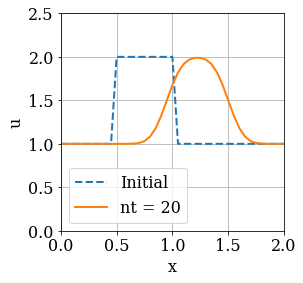

In [4]:
linear_convection(41)

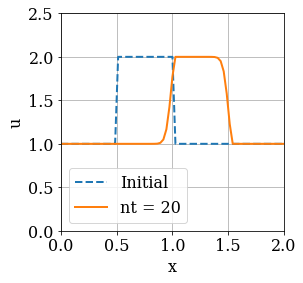

In [6]:
linear_convection(75)

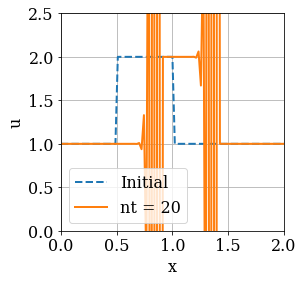

In [8]:
linear_convection(95)

In [9]:
#We have a stable code because we introduced sigma by dt = sigma*dx/c
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=20):
    # Discretizing spatial grid
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    
    # Computing the time-step size based on the CFL constraint
    dt = sigma * dx / c
    
    # Initial conditions
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    
    # Integrate the solution in TIME
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
        
    # Plot the Solution
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C1', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C3', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);

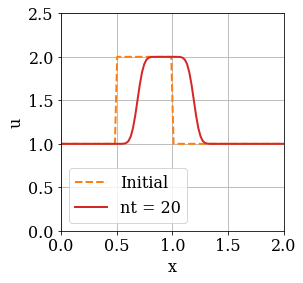

In [10]:


linear_convection_cfl(100)

